In [27]:
import numpy as np


def is_valid(data, target_mean, target_median, target_std, epsilon=0.1):
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    if abs(mean - target_mean) > epsilon:
        return False
    if abs(median - target_median) > epsilon:
        return False
    if abs(std - target_std) > epsilon:
        return False

    return True


def generate_data(target_mean, target_median, target_std, epsilon=0.1, min_value=0, max_value=100):
    data = [target_median]

    while is_valid(data, target_mean, target_median, target_std, epsilon):
        current_mean = np.mean(data)
        current_std = np.std(data)
        current_median = np.median(data)
        # generate a random number
        random_number = np.random.randint(max(min_value, target_mean - 2 * target_std),
                                          min(max_value, (target_mean + 2 * target_std)))
        # check if the new number let us closer to the target mean, median and std
        if abs(current_mean - target_mean) > abs((current_mean + random_number) / (len(data) + 1) - target_mean) and \
                abs(current_median - target_median) > abs(np.median(data + [random_number]) - target_median) and \
                abs(current_std - target_std) > abs(np.std(data + [random_number]) - target_std):
            data.append(random_number)

    return data

target_mean = 78
target_median = 65
target_std = 16

data = generate_data(target_mean, target_median, target_std)
print(data)


[65]


In [25]:
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print(f"mean: {mean}")
print(f"median: {median}")
print(f"std: {std}")

mean: 65.0
median: 65.0
std: 0.0


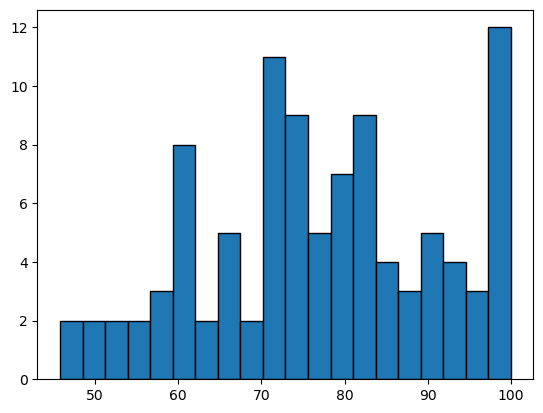

In [8]:
import matplotlib.pyplot as plt

plt.hist(data, bins=20, edgecolor='black')
plt.show()
